### Overview <a id=ov>

After the imports and a brief global variable definition (paths and names) we:

1. [Order Files](#src_files)
2. [Construct Dataframes](#src_df) 
3. [Results](#res)<br>
    3.1 [Overview Table](#res_table)<br>
    3.2 [Plots](#res_plots)
4. [Experiment Script](#experiments)

In [1]:
import tarfile
import os
import shutil

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from itertools import cycle

from tqdm.notebook import tqdm

from collections import namedtuple

In [36]:
tar_name = 'experiment_data3'
root_dir = './result_data_charging_wepa'
root_dir_extraction = f'{root_dir}/result_data_remote3'

sns.set_style("whitegrid")
sns.set_context("talk")

In [37]:
root_dir

'./result_data_charging_wepa'

In [38]:
%%time

shortnames = {
    'COL': 'COL',
    ' COL': 'COL',
    ' CTD': 'CTD',
    ' CTNR': 'CTNR',
    ' SL': 'SL',
    ' SLO': 'SLO',
    'RND':'RND',
    'allOrdersPopularity_future_z2': 'AOPF2',
    'allOrdersPopularity_future_z3': 'AOPF3',
    'allOrdersPopularity_future_z5': 'AOPF5',
    'allOrdersPopularity_past_z2': 'AOPP2',
    'allOrdersPopularity_past_z3': 'AOPP3',
    'allOrdersPopularity_past_z5': 'AOPP5',
    'classBasedCycleTime_z2': 'CBCT2',
    'classBasedCycleTime_z3': 'CBCT3',
    'classBasedCycleTime_z5': 'CBCT5',
    'retrievalPopularity_future_z2': 'ROPF2',
    'retrievalPopularity_future_z3': 'ROPF3',
    'retrievalPopularity_future_z5': 'ROPF5',
    'retrievalPopularity_past_z2': 'ROPP2',
    'retrievalPopularity_past_z3': 'ROPP3',
    'retrievalPopularity_past_z5': 'ROPP5',
    'VeryGreedy COL': 'GCOL'
}

CPU times: total: 0 ns
Wall time: 0 ns


### 1. Order Files <a id=src_files>

[Back to Overview](#ov)

In [34]:
%%time

def extract_result_files(src_path, tgt_path):
    if not os.path.exists(src_path):
        print("Tarball not found; skipping...")
        return
    tar = tarfile.open(src_path)
    for member in tar.getmembers():
        if member.isreg():  # skip if the TarInfo is not files
            # remove the path by reset it    
            member.name = os.path.basename(member.name) 
            tar.extract(member, tgt_path) # extract 
    # tar.extractall(root_dir_extraction)
    tar.close()

extract_result_files(f"{root_dir}/{tar_name}", root_dir_extraction)

Tarball not found; skipping...
CPU times: total: 0 ns
Wall time: 0 ns


In [64]:
%%time

def order_files(src_dir, shortnames):
    files = os.listdir(src_dir)
    pbar = tqdm(total=len(files))
    for i in range(len(files)):
        f_name = files[i]
        if not f_name.endswith('.csv'):
            continue
        segs = f_name.split('_')
        if "future" in segs or "past" in segs: 
            name = segs[0] + "_" + segs[1] + "_" + segs[2]
            charging_policy = segs[3]
            th = segs[4]
        elif "z2" in segs or "z3" in segs or "z5" in segs:
            name = segs[0] + "_" + segs[1]
            charging_policy = segs[2]
            th = segs[3]
        else:
            charging_policy = segs[1]
            th = segs[2]
            name = segs[0]
        orders = f'{int(segs[-1].split(".")[0]):06}'
        new_name = shortnames[name]
        tgt_dir = f'{src_dir}/{th}/{new_name}'
        if not os.path.exists(tgt_dir):
            os.makedirs(tgt_dir)
        shutil.move(f'{src_dir}/{f_name}',
                    f'{tgt_dir}/{orders}.csv')
        pbar.update(1)

order_files(root_dir, shortnames)

  0%|          | 0/3723 [00:00<?, ?it/s]

CPU times: total: 1.8 s
Wall time: 4.03 s


In [2]:
f_name = "allOrdersPopularity_future_z5_FixedCharge_th30_1001.csv"
segs = f_name.split('_')
if "future" in segs or "past" in segs: 
    name = segs[0] + "_" + segs[1] + "_" + segs[2]
    charging_policy = segs[3]
    th = segs[4]
elif "z2" in segs or "z3" in segs or "z5" in segs:
    name = segs[0] + "_" + segs[1]
    charging_policy = segs[2]
    th = segs[3]
else:
    charging_policy = segs[1]
    th = segs[2]
    name = segs[0]
orders = f'{int(segs[-1].split(".")[0]):06}'
new_name = shortnames[name]
#tgt_dir = f'{src_dir}/{th}/{new_name}'

NameError: name 'shortnames' is not defined

In [34]:
new_name

'AOPF5'

In [7]:
shortnames["COL"]

'COL'

In [40]:
%%time

def order_files(src_dir):
    files = os.listdir(src_dir)
    pbar = tqdm(total=len(files))
    for i in range(len(files)):
        f_name = files[i]
        if not f_name.endswith('.csv'):
            continue
        segs = f_name.split('_')
        name = segs[0]
        th = segs[1].split('th')[1]
        pt = segs[2].split('p')[1]
        if segs[3] == 'actions.csv':
            tgt_dir = f'{src_dir}/partition_{pt}/th_{th}/actions'
            orders = 'actions'
        else:
            orders = f'{int(segs[-1].split(".")[0]):06}'
            tgt_dir = f'{src_dir}/partition_{pt}/th_{th}'
        if not os.path.exists(tgt_dir):
            os.makedirs(tgt_dir)
        shutil.move(f'{src_dir}/{f_name}',
                    f'{tgt_dir}/{orders}.csv')
        pbar.update(1)

order_files(root_dir)

  0%|          | 0/15 [00:00<?, ?it/s]

CPU times: total: 0 ns
Wall time: 4.85 ms


### 2. Construct Dataframes <a id ='src_df'>

[Back to Overview](#ov)

In [65]:
%%time

def load_storage_strategy_dataframe(data_root):
    strategy_name = data_root.split('/')[-1]
    n_zones = int(strategy_name[-1]) if strategy_name[-1].isdigit() else 3
    if not os.path.exists(data_root):
        print(f"did not find path {data_root}; skipping...")
        return
    dfs = []
    csv_f_names = os.listdir(data_root)
    pbar = tqdm(total=len(csv_f_names))
    print(f'Loading result files into dataframes for the '
          f'{strategy_name} simulation run...')
    for f_name in csv_f_names:
        df_result_part = pd.read_csv(f'{data_root}/{f_name}', index_col=0)
        n_rows = df_result_part.shape[0]
        df_result_part['strategy_name'] = [strategy_name] * n_rows
        df_result_part['n_zones'] = [n_zones] * n_rows
        dfs.append(df_result_part)
        # print(strategy_name, n_zones, order_set_nr)
        pbar.update(1)
    strategy_df = pd.concat(dfs).reset_index(drop=True)
    strategy_df.name = strategy_name
    return strategy_df

dfs_d = dict({})
for th in [30, 40, 50, 60, 70, 80, 90, 100, "random"]:
    dfs_d[th] = []
    for shortname in ["COL", "AOPF5"]:
        df = load_storage_strategy_dataframe(
            f'{root_dir}/th{th}/{shortname}')
        if df is not None:
            dfs_d[th].append(df)

  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the COL simulation run...


  0%|          | 0/412 [00:00<?, ?it/s]

Loading result files into dataframes for the AOPF5 simulation run...
CPU times: total: 52.8 s
Wall time: 1min 55s


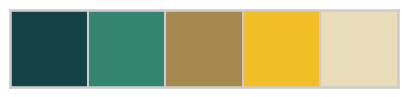

In [54]:
hex_colors = ['#144246',
              #'#69657e',
              '#338470',
              '#a6874e',
              #'#FFFF33', '#FFD801', '#FFDF00',
              '#f2be25', '#e8dcb9']
pal = sns.color_palette(hex_colors, desat=1)
sns.palplot(pal)

In [55]:
dfs_d[40]

[        total_distance  average_distance  travel_time_retrieval_ave  \
 0         1.650000e+02         23.571429                   0.000000   
 1         2.588000e+02         32.350000                   0.000000   
 2         3.526000e+02         39.177778                   0.000000   
 3         4.706000e+02         42.781818                   0.000000   
 4         7.604000e+02         50.693333                   0.000000   
 ...                ...               ...                        ...   
 411825    7.447094e+07         75.113381                 112.104413   
 411826    7.447123e+07         75.113454                 112.104580   
 411827    7.447159e+07         75.113513                 112.104485   
 411828    7.447181e+07         75.113581                 112.104502   
 411829    7.447225e+07         75.113797                 112.104818   
 
         distance_retrieval_ave  total_shift_distance  utilization_time  \
 0                     0.000000          0.000000e+00      

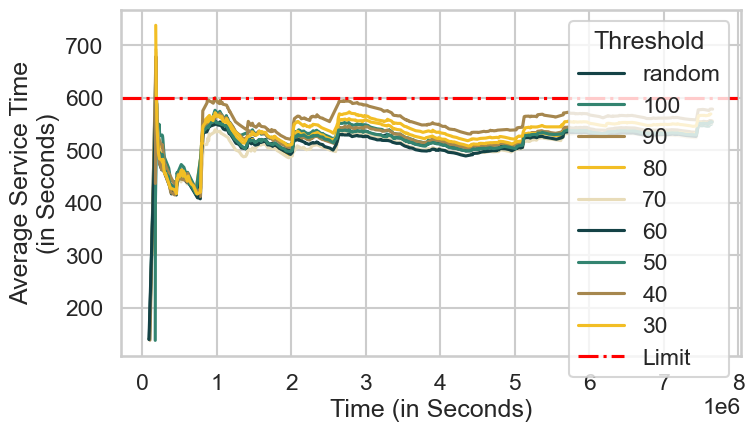

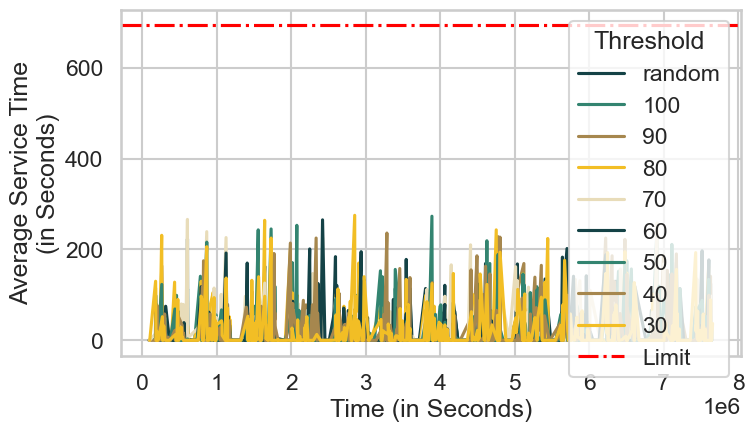

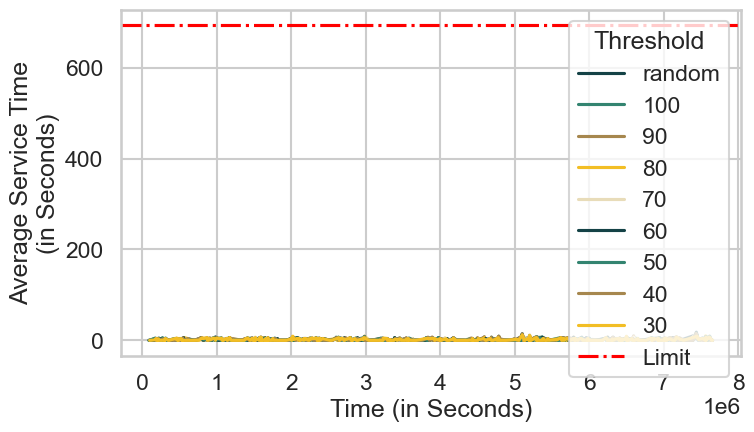

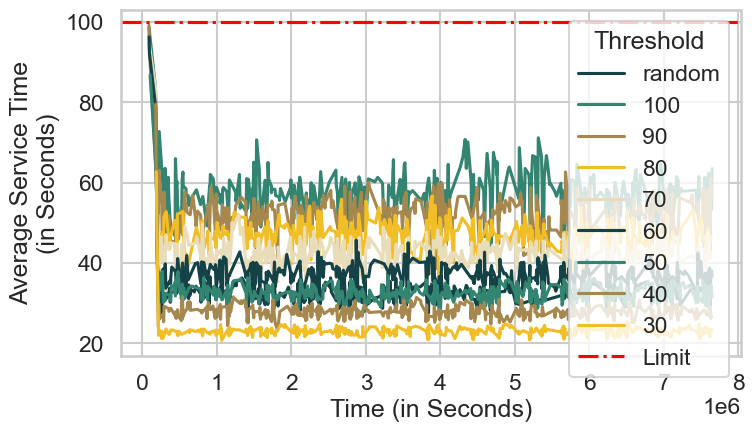

In [62]:
from copy import deepcopy

def plot_constraints(indicator, limit):
    _, ax = plt.subplots(figsize=(8, 4.5))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    
    palette = cycle(pal)
    xlim = 0
    for th in reversed(list(dfs_d.keys())):
        for df in dfs_d[th]:
            if df.strategy_name[0] == "AOPF5":
                df_parametrization_check = deepcopy(df)
                samples = df_parametrization_check.sample(min(500,df_parametrization_check.shape[0]))
                #if n_agv == 7:
                #    xlim = df_parametrization_check['kpi__makespan'].max() 
                #    print(xlim)
                ax = sns.lineplot(
                    ax=ax, x=samples['kpi__makespan'], y=samples[indicator], 
                    label=th, color=next(palette))

    ax.axhline(limit, 
               color='red', linestyle='dashdot', label='Limit') 

    ax.legend(title='Threshold')
    #ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')

    plt.savefig(f'{root_dir}/constraints__{indicator}.png', 
                dpi=200, bbox_inches='tight', pad_inches=0)
    plt.show()

plot_constraints('kpi__average_service_time', limit=600)
plot_constraints('n_queued_retrieval_orders', limit=693)
plot_constraints('n_queued_delivery_orders', limit=693)
plot_constraints('avg_battery_level', limit=100)

In [57]:
dfs_d[50][1]["kpi__average_service_time"][:-1]

0         137.800000
1         126.950000
2         129.866667
3         126.775000
4         127.440000
             ...    
411824    553.939998
411825    553.941010
411826    553.942108
411827    553.943276
411828    553.944731
Name: kpi__average_service_time, Length: 411829, dtype: float64

In [58]:
dfs_d[50][0]["kpi__average_service_time"][:-1]

0         100.700000
1          99.650000
2          99.533333
3          99.825000
4         101.680000
             ...    
411824    594.638503
411825    594.639264
411826    594.640038
411827    594.640817
411828    594.641604
Name: kpi__average_service_time, Length: 411829, dtype: float64

In [59]:
#ccheck_df.reset_index(drop=True)

### 3. Results <a id='res'>

[Back to Overview](#ov)

#### 3.1 Overview Table <a id='res_table'>
[Back to Overview](#ov)

In [60]:
new_slap_names = {
    'COL': 'COL',  # closest open pure lane 
    'SL': 'SL',
    'SLO': 'SLO',
    'RND':'RND',
    'CTD':'CTD',
    'CTNR':'CTNR',
    'AOPF2': 'TF2',
    'AOPF3': 'TF3',
    'AOPF5': 'TF5',
    'AOPP2': 'TP2',
    'AOPP3': 'TP3',
    'AOPP5': 'TP5',
    'CBCT2': 'T2',
    'CBCT3': 'T3',
    'CBCT5': 'T5',
    'ROPF2': 'PF2',
    'ROPF3': 'PF3',
    'ROPF5': 'PF5',
    'ROPP2': 'PP2',
    'ROPP3': 'PP3',
    'ROPP5': 'PP5',
    'GCOL': 'COL'
}

In [66]:
%%time

Result = namedtuple('Result', [
    'total_distance', 
#     'average_distance',
#     'travel_time_retrieval_ave',
    'total_shift_distance',
    'distance_retrieval_ave', 
    'utilization_time',
    'makespan', 
    'cycle_time', 
    'entropy',
    'average_service_time', 
    'throughput', 'max_delivery_buffer', 'max_retrieval_buffer',
    'index', 'name'])

def get_best_storage_strategies(experiment_dfs, n_best, scoring='average_service_time'):
    scores = []
    idx = 0
    for df in experiment_dfs:
        df_sorted = df[[
            'total_distance', 
            #'average_distance',
            #'travel_time_retrieval_ave',
            'total_shift_distance',
            'distance_retrieval_ave', 
            'utilization_time',
            'kpi__makespan', 
            'kpi__cycle_time', 
            'entropy',
            'kpi__average_service_time', 
            'kpi__throughput', 'n_finished_orders', 
            'n_queued_delivery_orders', 'n_queued_retrieval_orders']
        ].sort_values('kpi__makespan')
        df_sorted.name = new_slap_names[df.name]
        end_row = df_sorted.iloc[-1,:]
        res = Result(
            end_row['total_distance'], 
            # end_row['average_distance'],
            # end_row['travel_time_retrieval_ave'],
            end_row['total_shift_distance'],
            end_row['distance_retrieval_ave'], 
            end_row['utilization_time'],
            end_row['kpi__makespan'], 
            end_row['kpi__cycle_time'],
            end_row['entropy'],
            end_row['kpi__average_service_time'], 
            end_row['kpi__throughput'],
            df_sorted['n_queued_delivery_orders'].max(),
            df_sorted['n_queued_retrieval_orders'].max(),
            idx, df_sorted.name)
        scores.append(res)
        idx += 1
    scores_sorted = sorted(scores, key=lambda x: getattr(x,scoring))
    df_selection = []
    n_best = min(n_best, len(scores_sorted))
    for i in range(n_best):
        res = scores_sorted[i]
        print(res.average_service_time, i, experiment_dfs[scores_sorted[i].index].name)
        df_selection.append(experiment_dfs[scores_sorted[i].index])
    print()
    res_df = pd.DataFrame(data=scores_sorted)
    return df_selection, res_df

best_dfs_d = dict({})
res_overview_df_d = dict({})
for n_agv, dfs_s in dfs_d.items():
    print(f"Heuristic Service Time Ranks for a {n_agv} AGV System:")
    best_dfs_d[n_agv], res_overview_df_d[n_agv] = get_best_storage_strategies(
        dfs_s, 6, 'average_service_time')

Heuristic Service Time Ranks for a 30 AGV System:
568.9212684238768 0 AOPF5
615.6913712575816 1 COL

Heuristic Service Time Ranks for a 40 AGV System:
578.4926936478606 0 AOPF5
603.4045247129086 1 COL

Heuristic Service Time Ranks for a 50 AGV System:
553.9464964912852 0 AOPF5
594.6426771058726 1 COL

Heuristic Service Time Ranks for a 60 AGV System:
553.6978016718546 0 AOPF5
582.3035432095837 1 COL

Heuristic Service Time Ranks for a 70 AGV System:
551.9341835830362 0 AOPF5
584.2279231722166 1 COL

Heuristic Service Time Ranks for a 80 AGV System:
554.5669798825104 0 AOPF5
569.6612283891552 1 COL

Heuristic Service Time Ranks for a 90 AGV System:
555.9587269625782 0 AOPF5
597.4429899169861 1 COL

Heuristic Service Time Ranks for a 100 AGV System:
549.5211927554952 0 AOPF5
585.82647664086 1 COL

Heuristic Service Time Ranks for a random AGV System:
553.9464964912852 0 AOPF5
594.6426771058726 1 COL

CPU times: total: 797 ms
Wall time: 1.02 s


In [30]:
th = "random"
res_overview_df = res_overview_df_d[th]
best_dfs = best_dfs_d[th]
res_overview_df

,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,throughput,max_delivery_buffer,max_retrieval_buffer,index,name
0,7.384549e+07,5.392906e+06,164.815391,0.342136,7658236.5,1.091830e+06,1.6444,594.642677,0.053776,18,291,0,COL


In [56]:
for th, dfs in dfs_d.items():
    for df in dfs:
        if df.name in new_slap_names:
            df.name = new_slap_names[df.name]

In [57]:
baseline = 'CTD'

In [59]:
res_paper_df = res_overview_df.copy()
res_paper_df.index = res_overview_df['name'].values
res_paper_df = res_paper_df.drop(['name', 'index', 'makespan'], axis='columns')
res_paper_df = res_paper_df[[
    'average_service_time', 
    'total_distance', 
    'total_shift_distance', 
    'max_delivery_buffer', 
    'max_retrieval_buffer', #'entropy', 
    #'cycle_time', 
    #'throughput', 
    'utilization_time'
]]
#res_paper_df['throughput'] = res_paper_df['throughput'] * 3600
res_paper_df['total_distance'] += res_paper_df['total_shift_distance']
res_paper_df.drop(['total_shift_distance'], axis=1, inplace=True)
res_paper_df['total_distance'] /= (40 * 1000)
#res_paper_df['cycle_time'] = res_paper_df['cycle_time'] / (3600 * 24)
res_paper_df = res_paper_df.round(decimals=2)
res_paper_df.index.name = 'Storage Strategy'
res_paper_df.rename({
    'total_distance': 'Total Distance (in km)', 
    'cycle_time': 'Turnover Time (in days)',
    'entropy': 'Lanewise Entropy',
    'average_service_time': 'Average Service Time (in s)',
    'throughput': 'Throughput (pallets per hour)',
    'max_delivery_buffer': 'Maximum Delivery Queue Length', 
    'max_retrieval_buffer': 'Maximum Retrieval Queue Length', 
    'utilization_time': 'Utilization Rate'
}, axis='columns', inplace=True)
res_paper_df.columns.name = 'Metric'
#res_paper_df = res_paper_df.drop('COPL', axis='index')
res_paper_df.style.apply(
    lambda v: "font-weight: bold;", axis="columns"
)
if res_paper_df.shape[0] > 8:
    res_paper_df = pd.concat([res_paper_df.head(4), res_paper_df.tail(4)])

subset_min = [
    'Total Distance (in km)', 
    #'Turnover Time (in days)', 
    #'Lanewise Entropy', 
    'Average Service Time (in s)',
    'Maximum Delivery Queue Length',
    'Maximum Retrieval Queue Length'
]
subset_max = [
    #'Throughput (pallets per hour)'
]
subset_int = [
    'Maximum Delivery Queue Length',
    'Maximum Retrieval Queue Length'
]
res_paper_view = (res_paper_df.style
                .highlight_min(subset=subset_min, axis='index').format("{:.2f}")
                .highlight_max(subset=subset_max, color='green', axis='index').format(
                    subset=subset_int, formatter="{:3d}"))
res_paper_view


Metric,Average Service Time (in s),Total Distance (in km),Maximum Delivery Queue Length,Maximum Retrieval Queue Length,Utilization Rate
Storage Strategy,,,,,
COL,735.25,1996.33,17,290,0.33


In [61]:
# style df
#res_paper_df = res_paper_df.drop('SL', axis=0)
#res_paper_df = res_paper_df.rename({'SLO':'SL'}, axis=0)
res_table_paper = res_paper_df.copy()
if baseline:
    for col in res_paper_df.columns:
        percent = res_paper_df[col] / res_paper_df[col][baseline] * 100 - 100
        if col in subset_max:
            best_h = percent[percent == percent.max()].index
        else:
            best_h = percent[percent == percent.min()].index
        percent_str = percent.map('{:.2f}'.format)
        res_table_paper[col] = ('\\makecell[c]{' 
                                + (res_paper_df[col].map('{:.2f}'.format) 
                                   + "\\\\(" + percent_str + "\\%)}"))
        
        res_table_paper.loc[best_h, col] = ('\\makecell[c]{\\textbf{' 
                                + '{:.2f}'.format(res_paper_df.loc[best_h, col][0])
                                   + "}\\\\(\\textbf{" + percent_str.loc[best_h] + "\\%})}")
        if best_h[0] != baseline:
            res_table_paper.loc[baseline, col] = '{:.2f}'.format(res_paper_df.loc[baseline, col])
        else:
            res_table_paper.loc[baseline, col] = '\\textbf{' + '{:.2f}'.format(res_paper_df.loc[baseline, col]) + '}'

latex_string = res_table_paper.to_latex(bold_rows=True, multicolumn=True,escape=False)
print(type(latex_string), '\n', latex_string)

KeyError: 'CTD'

In [62]:
pd.__version__

'2.0.3'

#### 3.2 Plots <a id=res_plots>
    
[Back to Overview](#ov)

In [63]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [64]:
def trim_duplicate_signal_values(ts_df, column, verbose=False, samples=10000):
    ts_to_trim = ts_df[[column]].round(decimals=2)
    if verbose:
        print(f'Number of values in {column} before '
              f'trimming: {ts_to_trim.size}')
    ts_to_trim_shift_r = ts_to_trim.shift(1)
    ts_to_trim_shift_l = ts_to_trim.shift(-1)
    ts_trimmed = ts_to_trim[
        (ts_to_trim[column] != ts_to_trim_shift_r[column]) |
        (ts_to_trim[column] != ts_to_trim_shift_l[column])]
    # display(df_stufe_min_data)
    if verbose:
        print(f'Number of values in {column} after '
              f'trimming: {ts_trimmed.size}')
        print(f'Number of values after uniform sampling: {samples}')
    adjusted_n_samples = min(samples, ts_trimmed.shape[0])
    return ts_trimmed[column].sample(adjusted_n_samples)

def get_x_values(ts_df, index, column):
    return ts_df[column].loc[list(index)]

In [66]:
%%time

def plot_indicator(df, column_name, x_axis_col='kpi__makespan', ax=None, 
                   n_samples=10000, color=None, label='', alpha=1):
    trimmed_signal = trim_duplicate_signal_values(
        df, column_name, False, n_samples)
    time = get_x_values(df, trimmed_signal.index, x_axis_col)
    ax_modified = sns.lineplot(
        x=time, y=trimmed_signal.values, ax=ax, color=color, label=label, 
        alpha=alpha)
    ax_modified.set_ylabel(
        ' '.join([s.capitalize() for s in column_name.split('_')]))
    ax_modified.set_xlabel('Time (in Seconds)')
    return ax_modified

plot_indicator('n_queued_delivery_orders', 'kpi__makespan')

TypeError: string indices must be integers, not 'list'

Experiment Results for COL


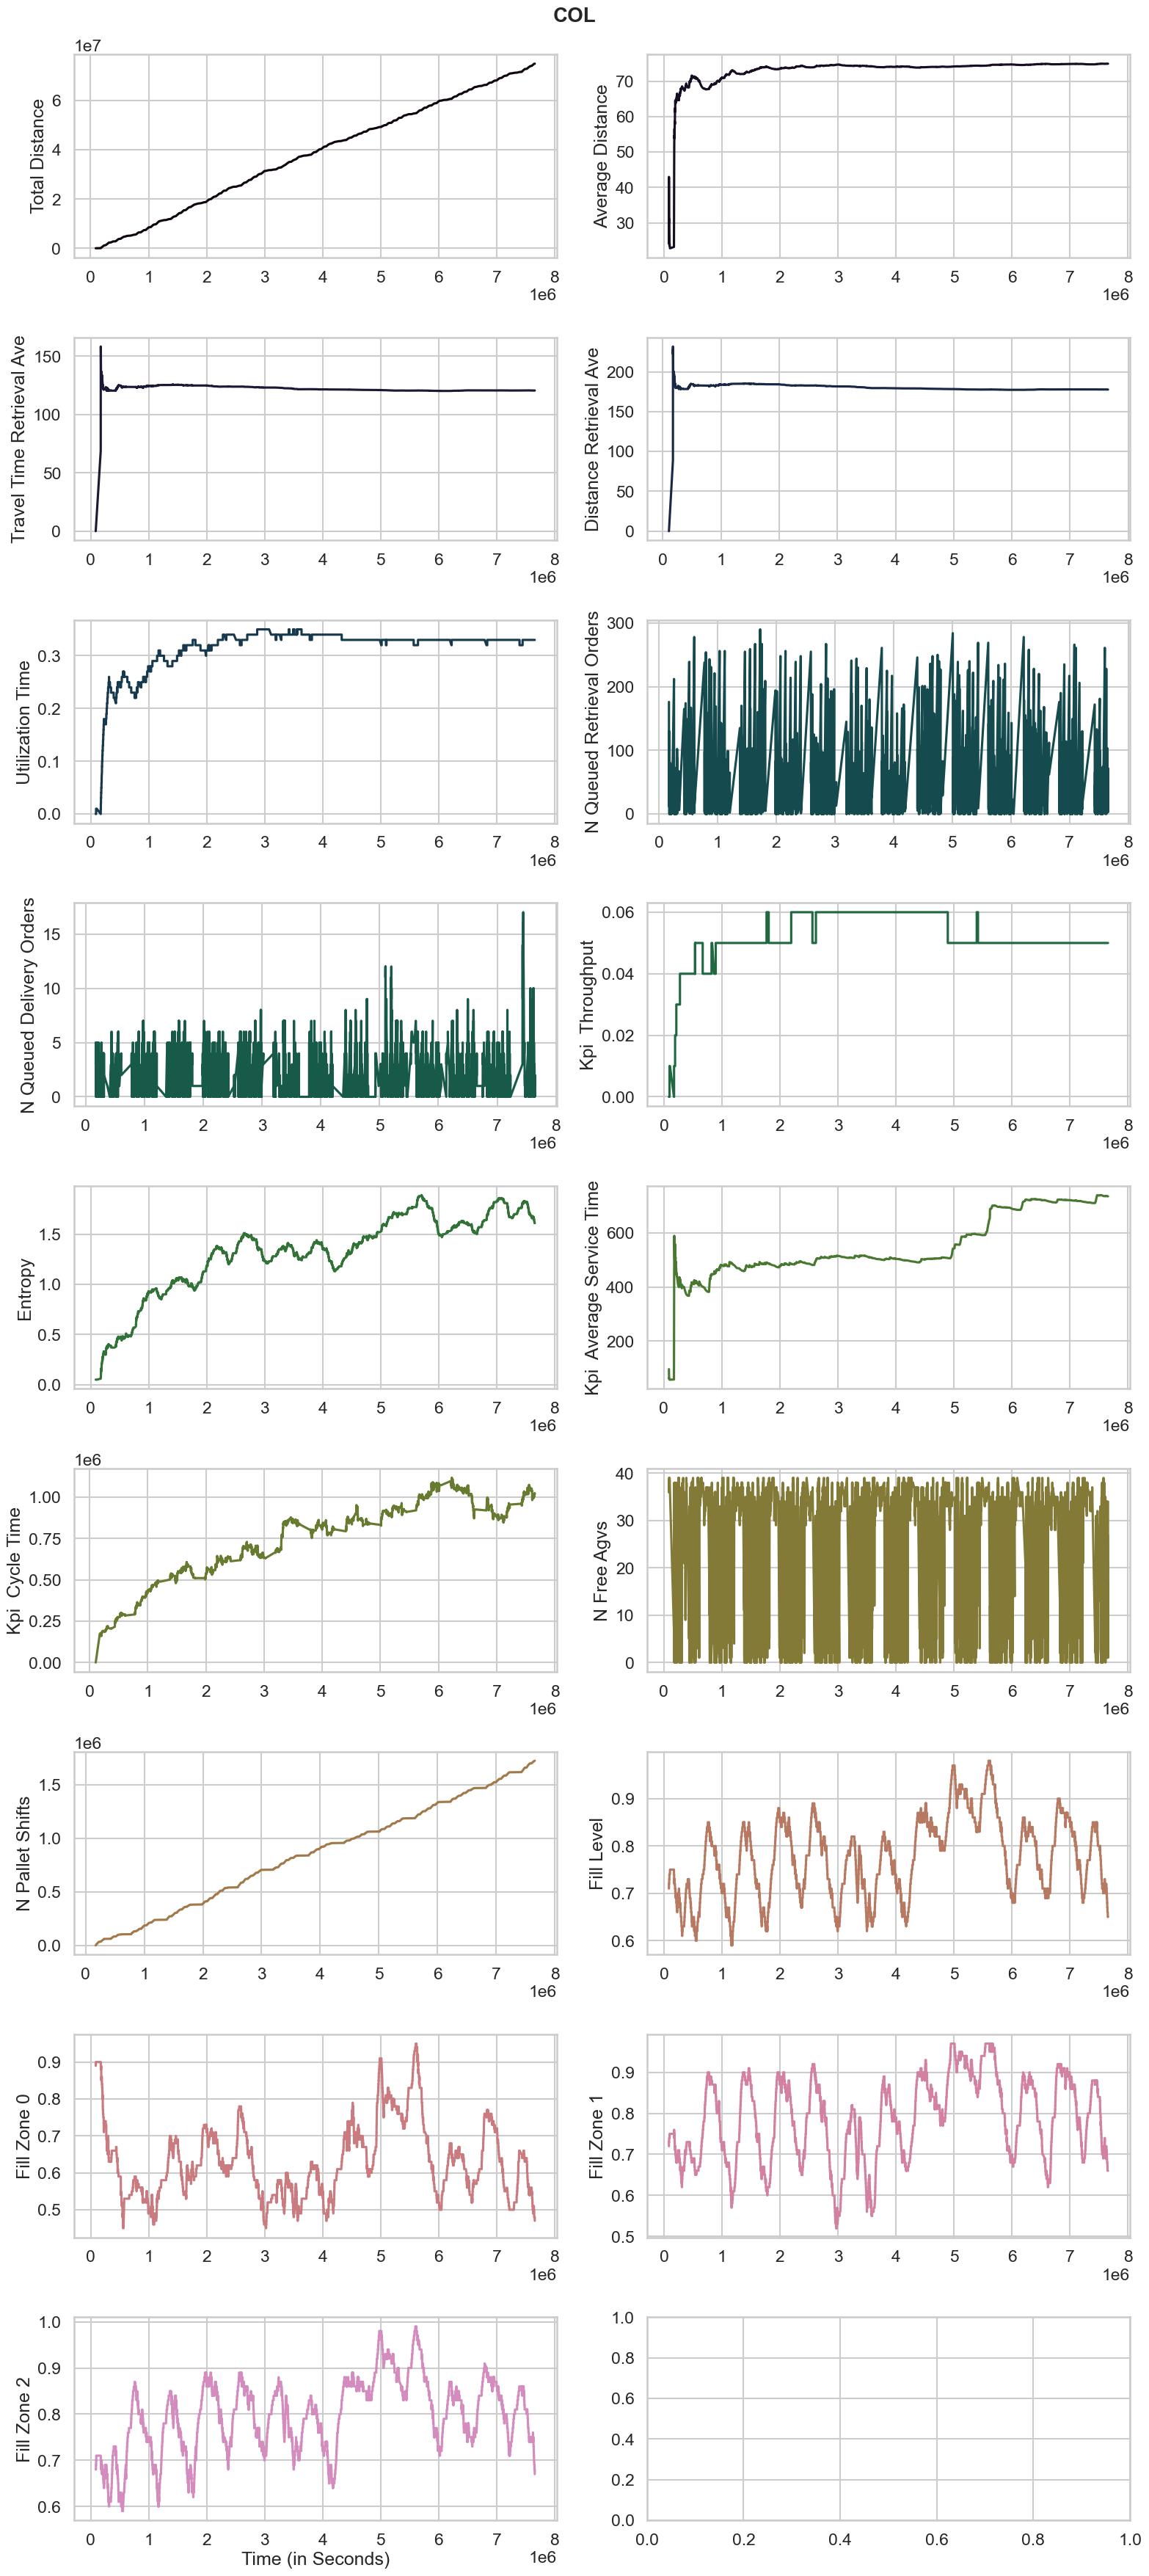

CPU times: total: 40.2 s
Wall time: 44.8 s


In [68]:
%%time


def get_indicator_columns(df_cols):
    res_cols_base = [
        'total_distance', 
        'average_distance',
        'travel_time_retrieval_ave',
        'distance_retrieval_ave', 
         'utilization_time',
        'n_queued_retrieval_orders', 
         'n_queued_delivery_orders', #'n_finished_orders', 
        'kpi__throughput', #'kpi__makespan',
         'entropy',
         'kpi__average_service_time', #'runtime', 
        'kpi__cycle_time',
        'n_free_agvs',
        'n_pallet_shifts', #'n_steps', 'n_decision_steps', 
        'fill_level'
    ]
    zone_fill_cols = []
    for i in range(5):
        col_candidate = f'fill_zone_{i}'
        if  col_candidate in list(df_cols): 
            zone_fill_cols.append(col_candidate)
    return res_cols_base + zone_fill_cols

def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)
    
def plot_all_experiments(dfs):
    for df_all in dfs:
        print(f"Experiment Results for {df_all.name}")
        palette = cycle(sns.color_palette('cubehelix', 25))

        cols_to_plot = get_indicator_columns(df_all.columns)
        nrows = len(cols_to_plot) // 2 + len(cols_to_plot) % 2
        _, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(16, 35))
        i = 0
        for col_name in cols_to_plot:
            ax = plot_indicator(df_all, col_name, 'kpi__makespan', 
                                ax=axes[i // 2][i % 2], color=next(palette))
            if i // 2 != nrows - 1:
                ax.set_xlabel('')
            i += 1
        plt.tight_layout()
        plt.suptitle(f'{df_all.name}', y=0.99, fontsize=20, fontweight='bold')
        make_space_above(axes, topmargin=1)
        plt.savefig(f'{root_dir}/{df_all.name}.png', dpi=200, bbox_inches='tight', pad_inches=0)
        plt.show()
        

plot_all_experiments(best_dfs)

In [69]:
for df in best_dfs:
    print(df.name)

COL


In [70]:
times = []
best_tmp = []
for df in best_dfs:
    if df.name == 'SL':
        continue
    else:
        if df.name == 'SLO':
            df.name = 'SL'
        best_tmp.append(df)
    times.append(df['kpi__makespan'].max())
    print(df.name, df['kpi__makespan'].max())
print(min(times))
best_dfs = best_tmp

COL 7658243.6
7658243.6


In [ ]:
##################################################################################
pal = sns.color_palette(['#144246', '#a6874e', '#FFFF33', '#FFD801', '#FFDF00', 
                         '#f2be25', '#e8dcb9', '#338470', '#69657e'], desat=1)

##################################################################################
umsatz_gabelstapler = pd.DataFrame(
    [(56.6, "Global", "2021"), (103.9, "Global", "2031"), 
     (16.63, "EU", "2021"), (44.24, "EU", "2031")], columns=['Umsatz (Mrd \$)', 'Region', 'Year'])
umsatz_gabelstapler_g = pd.DataFrame(
    [(237, "Global", "2020"), (294, "Global", "2021"), 
     (77, "EU", "2020"), (98, "EU", "2021")], columns=['Umsatz (Tausend \$)', 'Region', 'Year'])
umsatz_gabelstapler_a = pd.DataFrame(
    [(0.371, "2019", "Projektion"), 
     (5.69, "2027", "Projektion"), (13.4, "2030", "Projektion")], 
    columns=['Umsatz (Mrd \$)', 'Year', "Proj"])


##################################################################################
_, axes = plt.subplots(1, 2, figsize=(7.5, 4), gridspec_kw={'width_ratios':[4, 3]})

ax = sns.barplot(
    data=umsatz_gabelstapler, 
    x='Year', y='Umsatz (Mrd \$)', hue='Region', 
    ax=axes[0], palette=[pal[1], pal[5]], saturation=1
)
ax.set_title("Projected Forklift Sales")
ax.legend(loc='upper left')
ax.set_ylabel("Billion \$")

# ax = sns.barplot(
#     data=umsatz_gabelstapler_g, 
#     x='Year', y='Umsatz (Tausend \$)', hue='Region', 
#     ax=axes[1], palette=[pal[-2], pal[-1]]#, saturation=1
# )
# ax.set_title("Gegengewichtgabelstaplerumsatz")
# ax.legend(loc='upper right')

ax = sns.barplot(
    data=umsatz_gabelstapler_a, 
    x='Year', y='Umsatz (Mrd \$)', color=pal[0],
    ax=axes[1], saturation=1
)
ax = sns.lineplot(data=umsatz_gabelstapler_a, x=umsatz_gabelstapler_a['Year'], 
                  y=umsatz_gabelstapler_a['Umsatz (Mrd \$)'], 
                  color=pal[-2], ax=ax, markers=["o"], style="Proj", legend=False)
ax.set_title("Projected Counterbalance\nForklift Sales")
ax.set_ylabel(None)x

plt.tight_layout()
plt.savefig("9_umsatz_gabelstapler_v3.png", dpi=200, bbox_inches='tight', pad_inches=0.02)
plt.show()

### 4. Experiment Script <a id=experiments>
    
[Back to Overview](#ov)

In [ ]:
from typing import List

import pandas as pd

import numpy as np
from tqdm import tqdm
import time

from slapstack_controls.output_converters import FeatureConverter
from slapstack.core_state import State, StateCache
from slapstack.interface import SlapEnv
from slapstack.helpers import create_folders, TravelEventKeys, \
    parallelize_heterogeneously
from slapstack.interface_templates import SimulationParameters, SlapLogger
from slapstack_controls.storage_policies import (ClassBasedPopularity,
                                       ClassBasedCycleTime,
                                       ClosestOpenLocation,
                                       BatchLIFO, StoragePolicy)


class ExperimentLogger(SlapLogger):
    def __init__(self, filepath: str, logfile_name: str = 'experiment_data',
                 n_steps_between_saves=10000, nr_zones=3):
        super().__init__(filepath)
        self.n_steps_between_saves = n_steps_between_saves
        self.log_dir = filepath
        create_folders(f'{self.log_dir}/dummy')
        self.logfile_name = logfile_name
        self.log_data = []
        self.prev_n_orders = 0
        self.n_zones = nr_zones

    def set_logfile_name(self, logfile: str):
        self.logfile_name = logfile

    def log_state(self, s: State):
        first_step = len(self.log_data) == 0
        save_logs = len(self.log_data) % self.n_steps_between_saves == 0
        n_orders = len(s.trackers.finished_orders)
        if n_orders != self.prev_n_orders:
            self.prev_n_orders = n_orders
            self.log_data.append(ExperimentLogger.__get_row(s))
            if (not first_step and save_logs) or s.done:
                cols = self.__get_header()
                df = pd.DataFrame(data=self.log_data,
                                  columns=cols)
                df.to_csv(f'{self.log_dir}/{self.logfile_name}_{n_orders}.csv')
                self.log_data = []

    def __get_header(self):
        return [
            # Travel Info
            'total_distance',
            'average_distance',
            'travel_time_retrieval_ave',
            'distance_retrieval_ave',
            'utilization_time',
            # Order Info
            'n_queued_retrieval_orders',
            'n_queued_delivery_orders',
            'n_finished_orders',
            # KPIs
            'kpi__throughput',
            'kpi__makespan',
            'kpi__average_service_time',
            'kpi__cycle_time',
            # Broad Trackers
            'runtime',
            'n_free_agvs',
            'n_pallet_shifts',
            'n_steps',
            'n_decision_steps',
            'fill_level',
            'entropy'
        ] + [f'fill_zone_{i}' for i in range(self.n_zones)]

    @staticmethod
    def __get_row(s: State):
        zm = s.state_cache.zone_manager
        tes = s.trackers.travel_event_statistics
        t = s.trackers
        sc = s.state_cache
        am = s.agv_manager
        n_orders = len(t.finished_orders)
        row = (
            # Travel Info:
            tes.total_distance_traveled,
            tes.average_travel_distance(),
            tes.get_average_travel_time_retrieval(),
            tes.get_average_travel_distance_retrieval(),
            am.get_average_utilization() / s.time if s.time != 0 else 0,
            # Order Info:
            t.n_queued_retrieval_orders,
            t.n_queued_delivery_orders,
            len(t.finished_orders),
            # KPIs
            ExperimentLogger.__get_throughput(s),  # throughput
            s.time,  # makespan
            t.average_service_time,
            ExperimentLogger.__get_cycle_time(sc),
            # Broad Trackers
            time.time(),
            am.n_free_agvs,
            t.number_of_pallet_shifts,
            s.n_steps + s.n_silent_steps,
            s.n_steps,
            t.get_fill_level(),
            ExperimentLogger.__get_lane_entropy(sc)
        )
        fill_level_per_zone = tuple(
                1 - np.array(list(zm.n_open_locations_per_zone.values())) /
                np.array(list(zm.n_total_locations_per_zone.values()))
        )
        return row + fill_level_per_zone

    @staticmethod
    def __get_cycle_time(sc: StateCache):
        sku_cycle_times = sc.sku_cycle_time
        sum_cycle_times = 0
        if len(sku_cycle_times) != 0:
            for sku, cycle_time in sku_cycle_times.items():
                sum_cycle_times += cycle_time
            return sum_cycle_times / len(sku_cycle_times)
        else:
            return 0

    @staticmethod
    def __get_lane_entropy(sc: StateCache):
        lane_entropies = sc.lane_wise_entropies
        average_entropy = 0
        for lane, entropy in lane_entropies.items():
            average_entropy += entropy
        return average_entropy / len(lane_entropies)

    @staticmethod
    def __get_throughput(s: State):
        t = s.trackers
        return len(t.finished_orders) / s.time if s.time != 0 else 0

    @staticmethod
    def print_episode_info(strategy_name: str, episode_start_time: float,
                           episode_decisions: int, end_state: State,
                           ep_nr: int):
        zm = end_state.state_cache.zone_manager
        tes = end_state.trackers.travel_event_statistics
        t = end_state.trackers
        fill_level_per_zone = \
            1 - np.array(list(zm.n_open_locations_per_zone.values())) / \
            np.array(list(zm.n_total_locations_per_zone.values()))

        sc = end_state.state_cache
        print(f"Episode {ep_nr + 1} with storage strategy "
              f"{strategy_name} ended after "
              f"{time.time() - episode_start_time} seconds:")
        print(f"\tBroad Trackers:")
        print(f"\t\tNumber of decisions: {episode_decisions}")
        print(f"\t\tNumber of pallet shifts: {t.number_of_pallet_shifts}")
        print(f"\t\tFill Level: {t.get_fill_level()}")
        print(f"\t\tFill level per zone: {fill_level_per_zone}")
        print(f'\t\tAverage Lane Entropy: '
              f'{ExperimentLogger.__get_lane_entropy(sc)}')
        print(f'\tKPI:')
        print(f'\t\tThroughput: {ExperimentLogger.__get_throughput(end_state)}')
        print(f"\t\tMakespan: {end_state.time}")
        print(f"\t\tMean service time: {t.average_service_time}")
        print(f'\t\tCycle Time: {ExperimentLogger.__get_cycle_time(sc)}')
        print("\tTravel Info:")
        print(f"\t\tTotal travel distance: {tes.total_distance_traveled}")
        print(f"\t\tMean travel distance: {tes.average_travel_distance()}")
        print(f"\t\tMean travel time: {tes.average_travel_time()}")
        mean_dist_ret = (
                (tes.average_travel_distance(TravelEventKeys.RETRIEVAL_2ND_LEG)
                 + tes.average_travel_distance(TravelEventKeys.RETRIEVAL_1STLEG))
                / 2)
        print(f"\t\tMean travel distance retrieval: {mean_dist_ret}")
        mean_time_ret = (
            (tes.average_travel_time(TravelEventKeys.RETRIEVAL_2ND_LEG)
             + tes.average_travel_time(TravelEventKeys.RETRIEVAL_1STLEG)) / 2)
        print(f"\t\tMean travel time retrieval: "
              f"{mean_time_ret}")
        print(f'\t\tAverage AGV utilization: '
              f'{end_state.agv_manager.get_average_utilization() / end_state.time}')
        print(f"\tOrder Info:")
        print(f"\t\tPending Retrieval Orders: {t.n_queued_retrieval_orders}")
        print(f"\t\tPending Delivery Orders: {t.n_queued_delivery_orders}")
        print(f"\t\tNumber of orders completed: {len(t.finished_orders)}")
        print(f"\t\tNumber of Visible AGVs: {end_state.agv_manager.n_visible_agvs}")


def get_episode_env(n_partitions: int, use_case_partition_nr: int,
                    log_frequency: int, nr_zones: int):
    params = SimulationParameters(
        use_case_root_dir="use_case",
        use_case_n_partitions=n_partitions,
        use_case_partition_to_use=use_case_partition_nr,
        n_agvs=40,
        generate_orders=False,
        verbose=False,
        resetting=False,
        initial_pallets_storage_strategy=ClassBasedPopularity(
            retrieval_orders_only=False,
            future_counts=True,
            init=True,
            n_zones=nr_zones
        ),
        pure_lanes=True,
        # https://logisticsinside.eu/speed-of-warehouse-trucks/
        agv_speed=2,
        unit_distance=1.4,
        pallet_shift_penalty_factor=20,  # in seconds
        compute_feature_trackers=True
    )
    seeds = [56513]
    return SlapEnv(
        params, seeds,
        logger=ExperimentLogger(
            './result_data/', n_steps_between_saves=log_frequency,
            nr_zones=nr_zones),
        action_converters=[BatchLIFO()])


def run_episode(storage_strategy: StoragePolicy,
                ep_nr: int, n_progress_bar_orders=0, print_freq=0):
    # env_cp, done, n_decisions = deepcopy(environment), False, 0
    if n_progress_bar_orders:
        pbar = tqdm(total=n_progress_bar_orders)
    if hasattr(storage_strategy, 'n_zones'):
        environment: SlapEnv = get_episode_env(
            1, ep_nr, log_frequency=1000,
            nr_zones=storage_strategy.n_zones)
    else:
        environment: SlapEnv = get_episode_env(
            1, ep_nr, log_frequency=1000, nr_zones=3)
    done, n_decisions = False, 0
    state = environment.core_env.state
    # state.zone_manager.perform_sanity_check()
    environment.core_env.logger.set_logfile_name(
        f'ep{ep_nr}_{storage_strategy.name}')
    start = time.time()
    while not done:
        step_ts = time.time()
        # if state.decision_mode == "delivery":
        #     assert len(state.state_cache.legal_actions) <= len(
        #         state.state_cache.open_storage_locations)
        if len(state.trackers.finished_orders) < 1000:
            # warm start ;)
            action = ClosestOpenLocation().get_action(state)
        else:
            action = storage_strategy.get_action(state)
        as_time = time.time()
        state: State
        output, reward, done, info = environment.step(action)
        step_time = time.time()
        if print_freq and n_decisions % print_freq == 0:
            ExperimentLogger.print_episode_info(
                storage_strategy.name, start, n_decisions,
                environment.core_env.state, ep_nr)
            # state.zone_manager.perform_sanity_check()
        n_decisions += 1
        if n_progress_bar_orders:
            # noinspection PyUnboundLocalVariable
            pbar.update(1)
        # if n_decisions > 10000:
        #     break
    ExperimentLogger.print_episode_info(
        storage_strategy.name, start, n_decisions,
        environment.core_env.state, ep_nr)


def get_storage_strategies(nr_zones: List[int]):
    storage_strategies = []
    for n_zone in nr_zones:
        storage_strategies += [
            ClassBasedCycleTime(
                n_orders=10000, recalculation_steps=1000, n_zones=n_zone),
            ClassBasedPopularity(
                retrieval_orders_only=False, n_zones=n_zone,
                future_counts=True,
                name=f'allOrdersPopularity_future_z{n_zone}'),
            ClassBasedPopularity(
                retrieval_orders_only=True, n_zones=n_zone,
                future_counts=True,
                name=f'retrievalPopularity_future_z{n_zone}'),
            ClassBasedPopularity(
                retrieval_orders_only=False, n_zones=n_zone,
                future_counts=False, n_orders=10000, recalculation_steps=1000,
                name=f'allOrdersPopularity_past_z{n_zone}'),
            ClassBasedPopularity(
                retrieval_orders_only=True, n_zones=n_zone,
                future_counts=False, n_orders=10000, recalculation_steps=1000,
                name=f'retrievalPopularity_past_z{n_zone}')
        ]
    storage_strategies += [
        ClosestOpenLocation(very_greedy=True),
        ClosestOpenLocation(very_greedy=False),
    ]
    return storage_strategies


# TODO. think about and (re)program visualization
storage_policies = get_storage_strategies([2])
partitions = 1

# if __name__ == '__main__':
#     for j in range(0, partitions):
#         n_strategies = len(storage_policies)
#         for i in range(0,n_strategies):
#             run_episode(storage_policies[i], j, 205000, 1000)

#         # parallelize_heterogeneously(
#         #     [run_episode] * n_strategies,
#         #     list(zip(storage_policies,
#         #              [j] * n_strategies)))